<a href="https://colab.research.google.com/github/yashwanthvarma2711/EIP4_assignment1/blob/master/EIP4ASSN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


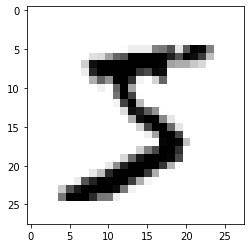

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0],cmap="gray_r")

In [0]:

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:

Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(64, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10))

model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys


In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:

model.fit(X_train, Y_train, batch_size=32, nb_epoch=12, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/12
60000/60000 [==============================] - 18s 299us/step - loss: 0.1203 - acc: 0.9632
Epoch 2/12
60000/60000 [==============================] - 17s 282us/step - loss: 0.0440 - acc: 0.9867
Epoch 3/12
60000/60000 [==============================] - 17s 291us/step - loss: 0.0325 - acc: 0.9898
Epoch 4/12
60000/60000 [==============================] - 17s 288us/step - loss: 0.0258 - acc: 0.9916
Epoch 5/12
60000/60000 [==============================] - 17s 288us/step - loss: 0.0212 - acc: 0.9929
Epoch 6/12
60000/60000 [==============================] - 17s 290us/step - loss: 0.0168 - acc: 0.9943
Epoch 7/12
60000/60000 [==============================] - 17s 285us/step - loss: 0.0142 - acc: 0.9953
Epoch 8/12
60000/60000 [==============================] - 17s 291us/step - loss: 0.0114 - acc: 0.9963
Epoch 9/12
60000/60000 [==============================] - 17s 286us/step - loss: 0.0111 - acc: 0.9962
Epoch 10/12
60000/60000 [==============================] - 17s 285us/step - loss: 

In [0]:

score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:

print(score)

[0.03987084140867587, 0.9916]


In [0]:
y_pred = model.predict(X_test)

In [0]:

print(y_pred[:9])
print(y_test[:9])

[[1.92425896e-15 5.27613198e-14 4.99458208e-09 1.10825397e-10
  1.54047252e-18 8.78338623e-17 2.83713297e-21 1.00000000e+00
  2.48170690e-12 6.06841175e-11]
 [1.35386813e-10 7.46723494e-15 1.00000000e+00 1.10063271e-17
  3.61758984e-16 1.55424975e-25 7.76962938e-11 1.08055513e-18
  6.10048084e-17 1.23451642e-20]
 [3.69667665e-11 9.99994278e-01 9.19620735e-09 1.36536589e-11
  5.11683311e-06 4.07505985e-09 2.79516446e-08 5.52257063e-07
  7.66235164e-09 5.51578019e-11]
 [9.99999881e-01 5.05349814e-19 6.32900579e-13 9.79756975e-16
  3.41956697e-17 3.59905411e-13 1.72925638e-07 7.26985879e-17
  2.89322073e-11 5.94038490e-12]
 [8.40721228e-17 3.29925059e-14 3.50450247e-16 2.05483883e-15
  9.99997854e-01 1.21922584e-17 9.08866022e-18 1.75272514e-12
  1.46473610e-12 2.10634971e-06]
 [4.93484364e-10 9.99993443e-01 2.37317707e-07 5.35553860e-13
  5.54485496e-06 4.27865344e-13 2.85661300e-10 7.81696031e-07
  5.08646885e-08 1.72702422e-10]
 [1.71294062e-23 3.53513368e-14 2.30306167e-16 6.89900450e

In [0]:

layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(list(layer_dict.keys()))
layer_dict.pop('max_pooling2d_5')
layer_dict.pop('max_pooling2d_6')
layer_dict.pop('dense_5')
layer_dict.pop('dense_6')

['conv2d_5', 'max_pooling2d_5', 'conv2d_6', 'max_pooling2d_6', 'flatten_3', 'dense_5', 'dense_6', 'activation_3']


In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored